In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd


def get_image_path(tomo_id):
    img_dir = '../data/pictures_process/mean_image_padded'
    return os.path.join(img_dir, f'image_moyenne_{tomo_id}.jpg')


def get_xy(tomo_id):
    csv_path = '../data/csv_raw/train_labels.csv'
    df = pd.read_csv(csv_path)
    y = df[df['tomo_id'] == tomo_id]['Motor_axis_1'].values[0]
    x = df[df['tomo_id'] == tomo_id]['Motor_axis_2'].values[0]
    return x, y

def get_tomo_ids():
    csv_path = '../data/csv_raw/train_labels.csv'
    df = pd.read_csv(csv_path)
    df_1_moteur = df[df['Number_of_motors'] == 1]
    return df_1_moteur['tomo_id'].unique()

X = []
y = []
for tomo_id in get_tomo_ids():
    xm, ym = get_xy(tomo_id)
    image_path = get_image_path(tomo_id)
    img = load_img(image_path)
    img_norm = img_to_array(img) / 255.0        # Charger et redimensionner
    X.append(img_norm)               # Convertir en array, normaliser [0,1]
    y.append((xm, ym))

npX = np.array(X)
npy = np.array(y)

2025-06-03 14:30:16.938235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:

from tensorflow.keras import Sequential, Input, layers

# model = Sequential()
# model.add(Input(shape=(960, 960, 3)))
# model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu'))
# model.add(layers.Conv2D(4, kernel_size=(3), activation='relu')) # kernel_size = 3 <==> (3, 3)
# model.add(layers.Flatten())
# model.add(layers.Dense(2, activation='linear'))
# model.summary()

model = Sequential()
model.add(Input(shape=(960, 960, 3)))
model.add(layers.Conv2D(6, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(4, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))    # Couche cachée ajoutée ici
model.add(layers.Dense(2, activation='linear'))

model.compile(
    optimizer='adam',
    loss='mse',        
    metrics=['mse'] 
)


In [14]:
history = model.fit(
    npX, 
    npy,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/5
8/8 [==============================] - 52s 6s/step - loss: 207207.0312 - mse: 207207.0312 - val_loss: 49058.7773 - val_mse: 49058.7773
Epoch 2/5
8/8 [==============================] - 53s 7s/step - loss: 71969.8047 - mse: 71969.8047 - val_loss: 27680.9316 - val_mse: 27680.9316
Epoch 3/5
8/8 [==============================] - 58s 7s/step - loss: 53704.0391 - mse: 53704.0391 - val_loss: 44901.0586 - val_mse: 44901.0586
Epoch 4/5
8/8 [==============================] - 58s 7s/step - loss: 45426.9492 - mse: 45426.9492 - val_loss: 24894.2461 - val_mse: 24894.2461
Epoch 5/5
8/8 [==============================] - 53s 7s/step - loss: 46346.1914 - mse: 46346.1914 - val_loss: 28408.9004 - val_mse: 28408.9004


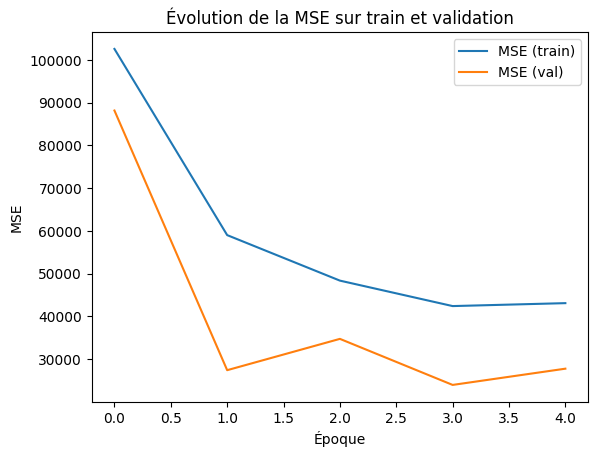

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='MSE (train)')
plt.plot(history.history['val_mse'], label='MSE (val)')
plt.xlabel('Époque')
plt.ylabel('MSE')
plt.legend()
plt.title('Évolution de la MSE sur train et validation')
plt.show()

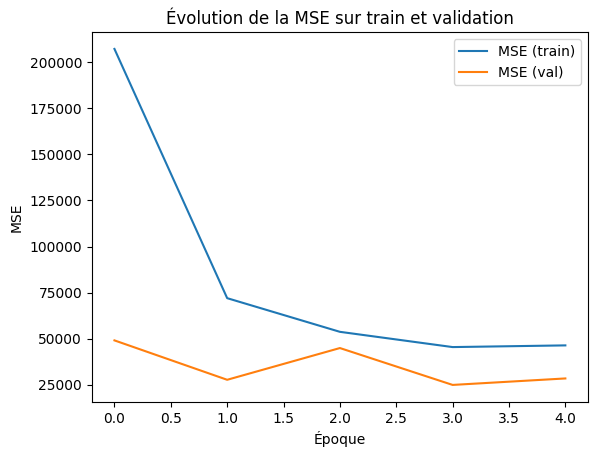

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='MSE (train)')
plt.plot(history.history['val_mse'], label='MSE (val)')
plt.xlabel('Époque')
plt.ylabel('MSE')
plt.legend()
plt.title('Évolution de la MSE sur train et validation')
plt.show()